https://github.com/RicardDurall/Benchmarking-Strategies-for-Asset-Allocation

Asset Allocation: From Markowitz to Deep Reinforcement Learning


In [ ]:
! pip install --upgrade pandas-datareader
! pip install stable_baselines3

Restart after this



# Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

### Select the tickers and timeframe

In [53]:
sns.set_theme()

In [41]:
# ! git clone https://github.com/RicardDurall/Benchmarking-Strategies-for-Asset-Allocation
# ! cp /content/Benchmarking-Strategies-for-Asset-Allocation/deepRL.py /content

In [2]:
# tickers = ["URTH", "BNDX"]
# tickers = ["URTH", "BNDX", 'AAPL', "GE",'JPM', 'MSFT', 'VOD', 'NKE','NVDA',"MMM"]
tickers = [ 'AAPL', "GE",'JPM', 'MSFT', 'VOD', 'NKE','NVDA',"MMM"]
# tickers = ['AAPL', "GE",'JPM', 'MSFT', 'VOD', 'NKE','NVDA',"MMM"]
# tickers = ['ABB', 'ASSA-B.ST', 'AZN', 'ATCO-A.ST', 'ATCO-B.ST', 'ALIV-SDB.ST', 'BOL.ST',
#            'ELUX-B.ST', 'ERIC-B.ST', 'GETI-B.ST', 'HM-B.ST', 'HEXA-B.ST', 'INVE-B.ST', 'KINV-B.ST',
#            'NDA-SE.ST', 'SAND', 'SECU-B.ST', 'SEB-A.ST', 'SKA-B.ST', 'SKF-B.ST', 'SSAB-A.ST',
#            'SCA-B.ST', 'SHB-A.ST', 'SWED-A.ST', 'SWMA.ST', 'TEL2-B.ST', 'TELIA.ST', 'VOLV-B.ST'   
#            ]

In [78]:
# start_date = '2003-01-01'
start_date = '2019-01-01'
end_date = "2022-11-20"
# this is bull market
df = pdr.get_data_yahoo([tickers][0], start=start_date, end=end_date)

In [4]:
# collective_df =  df['AAPL'], df['GE'], df['JPM'], df['MSFT'], df['VOD'], df['NKE'], df['NVDA'], df['MMM']
# collective_df = df['URTH'], df['BNDX']
# collective_df = df['URTH'], df['BNDX']
# collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
# collective_df = df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]


In [79]:
# bear market 
##  1st of January 2003 to the 1st of January 2010

# bull market
## 2010-01-01 to end="2017-01-01"
data = df.copy()
# we copy the neighbour values to NaN entries
data['Adj Close'] = data['Adj Close'].ffill()
df = df.bfill(axis=1)
data['Adj Close'] = data['Adj Close'].bfill()
df = df.bfill(axis=1)

data = data['Adj Close']
data.head(2)

Symbols,AAPL,GE,JPM,MSFT,VOD,NKE,NVDA,MMM
Date,,,,,,,,
2018-12-31,38.061710,57.332226,86.382866,97.305801,15.073009,71.361435,33.130451,165.238434
2019-01-02,38.105133,60.967560,87.878342,96.874702,15.416997,71.284416,33.805473,165.594025


In [80]:
data

Symbols,AAPL,GE,JPM,MSFT,VOD,NKE,NVDA,MMM
Date,,,,,,,,
2018-12-31,38.061710,57.332226,86.382866,97.305801,15.073009,71.361435,33.130451,165.238434
2019-01-02,38.105133,60.967560,87.878342,96.874702,15.416997,71.284416,33.805473,165.594025
2019-01-03,34.309578,61.043297,86.629456,93.310890,15.354454,70.023514,31.763044,159.358780
2019-01-04,35.774246,62.330807,89.823082,97.650703,15.659355,71.852303,33.798031,165.914902
2019-01-07,35.694607,66.193352,89.885521,97.775230,15.776626,72.882217,35.587311,165.533295
...,...,...,...,...,...,...,...,...
2022-11-14,148.279999,85.830002,133.910004,240.871185,11.805474,104.070564,162.908325,129.513489
2022-11-15,150.039993,87.139999,132.940002,241.290009,10.999902,106.383461,166.617371,129.701294
2022-11-16,148.789993,84.900002,133.119995,241.729996,11.143754,104.907997,159.059311,127.250000


### We check that tehre are no NAN values

In [81]:
data.isna().sum()

Symbols
AAPL    0
GE      0
JPM     0
MSFT    0
VOD     0
NKE     0
NVDA    0
MMM     0
dtype: int64

### Check if all tickers have the same number of data points

In [82]:
no_datasets = []
for i in tickers:
    no_data_points = len(data[i])
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

data_points_df.head()

,0,1
0,AAPL,981
1,GE,981
2,JPM,981
3,MSFT,981
4,VOD,981


### Define the start-end dates for the training and testing data

In [83]:
train_pct = 0.8
samples_train = int(train_pct*len(data))
data_train = data[:samples_train]
data_test = data[samples_train:]

In [84]:
data_test.head(1)

Symbols,AAPL,GE,JPM,MSFT,VOD,NKE,NVDA,MMM
Date,,,,,,,,
2022-02-09,175.486099,98.919907,152.71843,308.320953,17.620756,144.705261,266.800476,156.983749


### Visualization

In [85]:
data

Symbols,AAPL,GE,JPM,MSFT,VOD,NKE,NVDA,MMM
Date,,,,,,,,
2018-12-31,38.061710,57.332226,86.382866,97.305801,15.073009,71.361435,33.130451,165.238434
2019-01-02,38.105133,60.967560,87.878342,96.874702,15.416997,71.284416,33.805473,165.594025
2019-01-03,34.309578,61.043297,86.629456,93.310890,15.354454,70.023514,31.763044,159.358780
2019-01-04,35.774246,62.330807,89.823082,97.650703,15.659355,71.852303,33.798031,165.914902
2019-01-07,35.694607,66.193352,89.885521,97.775230,15.776626,72.882217,35.587311,165.533295
...,...,...,...,...,...,...,...,...
2022-11-14,148.279999,85.830002,133.910004,240.871185,11.805474,104.070564,162.908325,129.513489
2022-11-15,150.039993,87.139999,132.940002,241.290009,10.999902,106.383461,166.617371,129.701294
2022-11-16,148.789993,84.900002,133.119995,241.729996,11.143754,104.907997,159.059311,127.250000


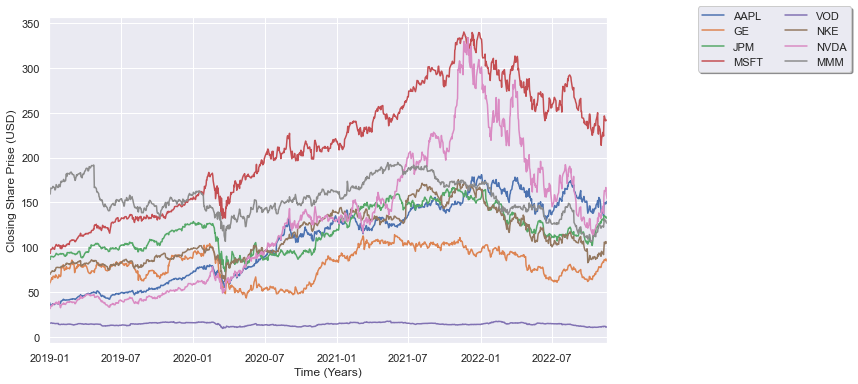

In [89]:
plt.rcParams["figure.figsize"] = (10,6)
for i in tickers:
    plt.plot(data[i], label=i)

# only one line may be specified; full height
plt.axvline(pd.to_datetime(start_date), color='black', linestyle='--', lw=2)
# plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1.05), ncol=2, fancybox=True, shadow=True)
plt.margins(x=0)
plt.ylabel("Closing Share Prise (USD)")
plt.xlabel("Time (Years)")
plt.savefig('data0.png',bbox_inches='tight')

# -----------------------------------------------
# ----------------------------------------------- 

# Evaluating models

## Deep Reinfrocement Learning

In [13]:
# ! copy "Benchmarking-Strategies-for-Asset-Allocation\deepRL.py" ".\"


In [14]:
import numpy as np
import random
from deepRL import StockEnvTrade, train, DRL_prediction
from stable_baselines3.common.vec_env import DummyVecEnv

In [90]:
rebalance_period = 1
re_df = data.iloc[::rebalance_period, :]
train_re_df = data_train.iloc[::rebalance_period, :]
test_re_df = data_test.iloc[::rebalance_period, :]

In [91]:
timesteps = 10000
runs = 3

# timesteps  = 10000
# runs = 3


# timesteps  = 10000
# runs = 1


policy = "MlpPolicy"
length = test_re_df.shape[0]
stocks = test_re_df.shape[1]

### PPO

In [17]:
# portfolio_weights_ppo[0]

In [92]:
algo = "PPO"


In [18]:
algo = "PPO"
Cumulative_returns_daily_drl_ppo = np.zeros([runs, length])
portfolio_weights_ppo = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):
    print("started ",i)
    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_ppo[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_ppo[i])
    cont = cont +1
    print("working:",check,"   ",length)
    # if check != length:
    #     continue

    return_stocks = test_re_df.pct_change()
    return_stocks_ppo = np.sum(return_stocks.multiply(portfolio_weights_ppo[i]),axis=1)
    Cumulative_returns_daily_drl_ppo[i] = (1+return_stocks_ppo).cumprod()
    i = i+1

started  0
Init stocks in init() :  [10, 10, 10, 10, 10, 10, 10, 10]
Training time:  0.30289382537206017  minutes
Init stocks in init() :  [10, 10, 10, 10, 10, 10, 10, 10]
DAY  0
DAY  1
DAY  2
DAY  3
DAY  4
DAY  5
DAY  6
DAY  7
DAY  8
DAY  9
DAY  10
DAY  11
DAY  12
DAY  13
DAY  14
DAY  15
DAY  16
DAY  17
DAY  18
DAY  19
DAY  20
DAY  21
DAY  22
DAY  23
DAY  24
DAY  25
DAY  26
DAY  27
DAY  28
DAY  29
DAY  30
DAY  31
DAY  32
DAY  33
DAY  34
DAY  35
DAY  36
DAY  37
DAY  38
DAY  39
DAY  40
DAY  41
DAY  42
DAY  43
DAY  44
DAY  45
DAY  46
DAY  47
DAY  48
DAY  49
DAY  50
DAY  51
DAY  52
DAY  53
DAY  54
DAY  55
DAY  56
DAY  57
DAY  58
DAY  59
DAY  60
DAY  61
DAY  62
DAY  63
DAY  64
DAY  65
DAY  66
DAY  67
DAY  68
DAY  69
DAY  70
DAY  71
DAY  72
DAY  73
DAY  74
DAY  75
DAY  76
DAY  77
DAY  78
DAY  79
DAY  80
DAY  81
DAY  82
DAY  83
DAY  84
DAY  85
DAY  86
DAY  87
DAY  88
DAY  89
DAY  90
DAY  91
DAY  92
DAY  93
DAY  94
DAY  95
DAY  96
DAY  97
DAY  98
DAY  99
DAY  100
DAY  101
DAY  102
DAY  103
DA

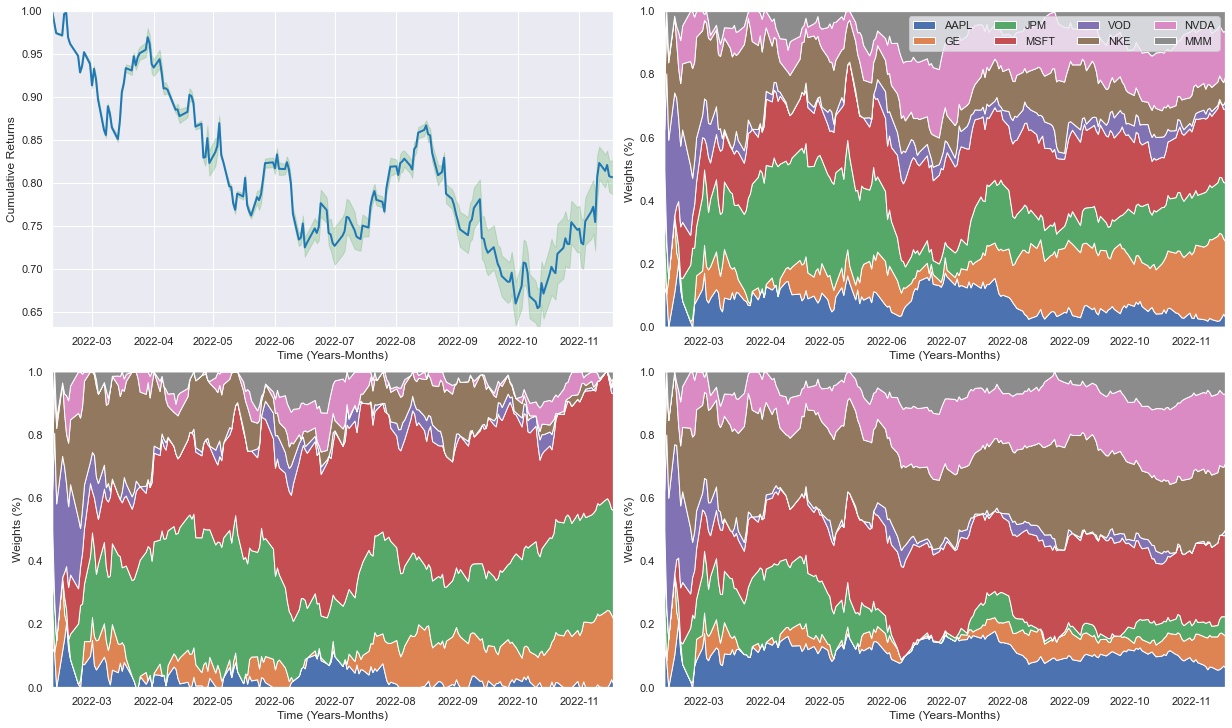

In [93]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

ppo_mean = np.mean(np.array(Cumulative_returns_daily_drl_ppo),axis=0)
ppo_std = np.std(np.array(Cumulative_returns_daily_drl_ppo),axis=0)

axs[0,0].plot(test_re_df.index, ppo_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, ppo_mean - ppo_std, ppo_mean + ppo_std, alpha=0.2, color='tab:green')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ppo_ = np.mean(np.array(portfolio_weights_ppo),axis=0)
df = pd.DataFrame (portfolio_weights_ppo_, index = test_re_df.index, columns = tickers)

collective_df = ()
for t in tickers :
    collective_df += (df[t], )

axs[0,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,1].legend(loc='upper right', ncol=4)
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
df = pd.DataFrame (portfolio_weights_ppo_, index = test_re_df.index, columns = tickers)

collective_df = ()
for t in tickers :
    collective_df += (df[t], )

axs[1,0].stackplot(test_re_df.index, collective_df, labels=tickers)
# axs[1,0].legend(loc='upper right')
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmin(Cumulative_returns_daily_drl_ppo[:,-1])]
df = pd.DataFrame (portfolio_weights_ppo_, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )

axs[1,1].stackplot(test_re_df.index, collective_df, labels=tickers)
# axs[1,1].legend(loc='upper right')
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")
# plt.show()
plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

### A2C

In [94]:
algo = "A2C"

In [20]:
algo = "A2C"
Cumulative_returns_daily_drl_a2c = np.zeros([runs, length])
portfolio_weights_a2c = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_a2c[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_a2c[i]) 
    cont = cont +1
    # if check != length:
    #     continue

    return_stocks = test_re_df.pct_change()
    return_stocks_a2c = np.sum(return_stocks.multiply(portfolio_weights_a2c[i]),axis=1)
    Cumulative_returns_daily_drl_a2c[i] = (1+return_stocks_a2c).cumprod()
    i = i+1

Init stocks in init() :  [10, 10, 10, 10, 10, 10, 10, 10]
Training time:  0.30106958548227947  minutes
Init stocks in init() :  [10, 10, 10, 10, 10, 10, 10, 10]
DAY  0
DAY  1
DAY  2
DAY  3
DAY  4
DAY  5
DAY  6
DAY  7
DAY  8
DAY  9
DAY  10
DAY  11
DAY  12
DAY  13
DAY  14
DAY  15
DAY  16
DAY  17
DAY  18
DAY  19
DAY  20
DAY  21
DAY  22
DAY  23
DAY  24
DAY  25
DAY  26
DAY  27
DAY  28
DAY  29
DAY  30
DAY  31
DAY  32
DAY  33
DAY  34
DAY  35
DAY  36
DAY  37
DAY  38
DAY  39
DAY  40
DAY  41
DAY  42
DAY  43
DAY  44
DAY  45
DAY  46
DAY  47
DAY  48
DAY  49
DAY  50
DAY  51
DAY  52
DAY  53
DAY  54
DAY  55
DAY  56
DAY  57
DAY  58
DAY  59
DAY  60
DAY  61
DAY  62
DAY  63
DAY  64
DAY  65
DAY  66
DAY  67
DAY  68
DAY  69
DAY  70
DAY  71
DAY  72
DAY  73
DAY  74
DAY  75
DAY  76
DAY  77
DAY  78
DAY  79
DAY  80
DAY  81
DAY  82
DAY  83
DAY  84
DAY  85
DAY  86
DAY  87
DAY  88
DAY  89
DAY  90
DAY  91
DAY  92
DAY  93
DAY  94
DAY  95
DAY  96
DAY  97
DAY  98
DAY  99
DAY  100
DAY  101
DAY  102
DAY  103
DAY  104
DAY 

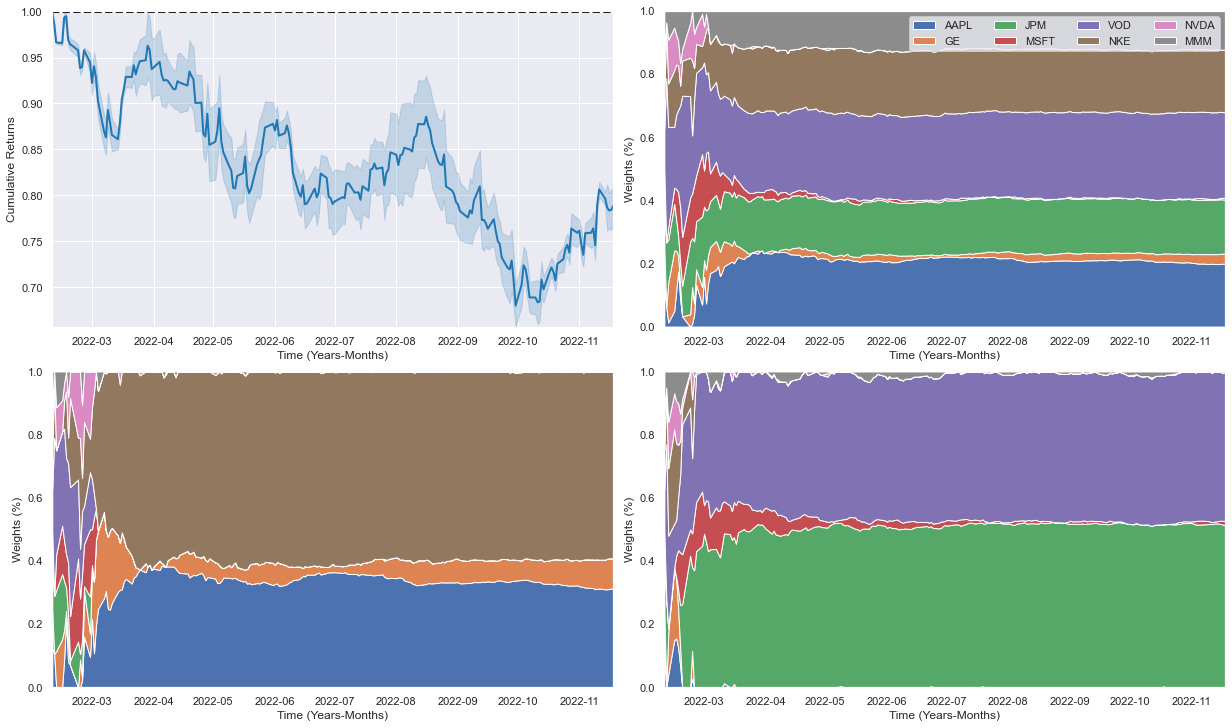

In [95]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

a2c_mean = np.mean(np.array(Cumulative_returns_daily_drl_a2c),axis=0)
a2c_std = np.std(np.array(Cumulative_returns_daily_drl_a2c),axis=0)

axs[0,0].plot(test_re_df.index, a2c_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, a2c_mean - a2c_std, a2c_mean + a2c_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_a2c_ = np.mean(np.array(portfolio_weights_a2c),axis=0)
df = pd.DataFrame (portfolio_weights_a2c_, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )


axs[0,1].stackplot(test_re_df.index,collective_df, labels=tickers)
axs[0,1].legend(loc='upper right', ncol=4)
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
df = pd.DataFrame (portfolio_weights_a2c_, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )

axs[1,0].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
df = pd.DataFrame (portfolio_weights_a2c_, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )

axs[1,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

### DDPG

In [96]:
algo = "DDPG"


In [57]:
algo = "DDPG"
Cumulative_returns_daily_drl_ddpg = np.zeros([runs, length])
portfolio_weights_ddpg = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_ddpg[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_ddpg[i]) 
    cont = cont +1
    # if check != length:
    #     continue

    return_stocks = test_re_df.pct_change()
    return_stocks_ddpg = np.sum(return_stocks.multiply(portfolio_weights_ddpg[i]),axis=1)
    Cumulative_returns_daily_drl_ddpg[i] = (1+return_stocks_ddpg).cumprod()
    i = i+1

Init stocks in init() :  [10, 10, 10, 10, 10, 10, 10, 10]
Training time:  2.1378846724828082  minutes
Init stocks in init() :  [10, 10, 10, 10, 10, 10, 10, 10]
DAY  0
DAY  1
DAY  2
DAY  3
DAY  4
DAY  5
DAY  6
DAY  7
DAY  8
DAY  9
DAY  10
DAY  11
DAY  12
DAY  13
DAY  14
DAY  15
DAY  16
DAY  17
DAY  18
DAY  19
DAY  20
DAY  21
DAY  22
DAY  23
DAY  24
DAY  25
DAY  26
DAY  27
DAY  28
DAY  29
DAY  30
DAY  31
DAY  32
DAY  33
DAY  34
DAY  35
DAY  36
DAY  37
DAY  38
DAY  39
DAY  40
DAY  41
DAY  42
DAY  43
DAY  44
DAY  45
DAY  46
DAY  47
DAY  48
DAY  49
DAY  50
DAY  51
DAY  52
DAY  53
DAY  54
DAY  55
DAY  56
DAY  57
DAY  58
DAY  59
DAY  60
DAY  61
DAY  62
DAY  63
DAY  64
DAY  65
DAY  66
DAY  67
DAY  68
DAY  69
DAY  70
DAY  71
DAY  72
DAY  73
DAY  74
DAY  75
DAY  76
DAY  77
DAY  78
DAY  79
DAY  80
DAY  81
DAY  82
DAY  83
DAY  84
DAY  85
DAY  86
DAY  87
DAY  88
DAY  89
DAY  90
DAY  91
DAY  92
DAY  93
DAY  94
DAY  95
DAY  96
DAY  97
DAY  98
DAY  99
DAY  100
DAY  101
DAY  102
DAY  103
DAY  104
DAY  

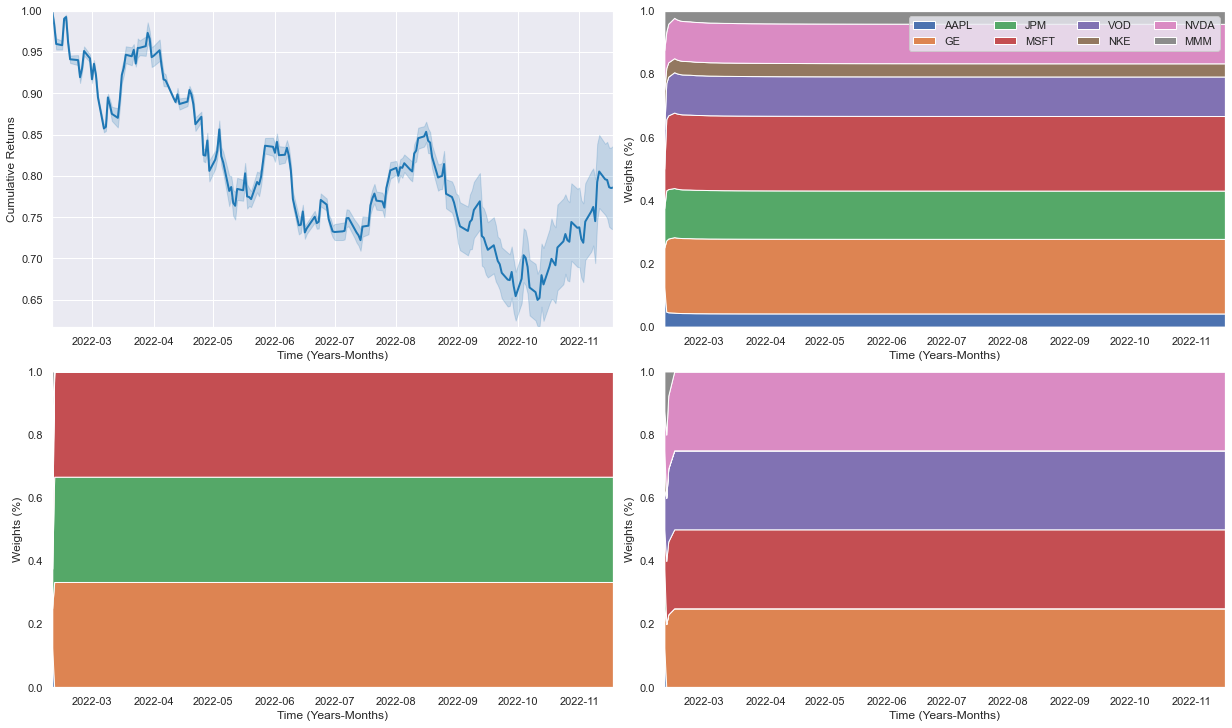

In [97]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

ddpg_mean = np.mean(np.array(Cumulative_returns_daily_drl_ddpg),axis=0)
ddpg_std = np.std(np.array(Cumulative_returns_daily_drl_ddpg),axis=0)

axs[0,0].plot(test_re_df.index, ddpg_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, ddpg_mean - ddpg_std, ddpg_mean + ddpg_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ddgpc_ = np.mean(np.array(portfolio_weights_ddpg),axis=0)
df = pd.DataFrame (portfolio_weights_ddgpc_, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )

axs[0,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,1].legend(loc='upper right',ncol=4)
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_ddgpc_ = portfolio_weights_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
df = pd.DataFrame (portfolio_weights_ddgpc_, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )
axs[1,0].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ddgpc_ = portfolio_weights_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
df = pd.DataFrame (portfolio_weights_ddgpc_, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )
axs[1,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

### SAC

In [98]:
algo = "SAC"


In [24]:
algo = "SAC"
Cumulative_returns_daily_drl_sac = np.zeros([runs, length])
portfolio_weights_sac = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_sac[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_sac[i]) 
    cont = cont +1
    # if check != length:
    #     continue
    
    return_stocks = test_re_df.pct_change()
    return_stocks_sac = np.sum(return_stocks.multiply(portfolio_weights_sac[i]),axis=1)
    Cumulative_returns_daily_drl_sac[i] = (1+return_stocks_sac).cumprod()
    i = i+1

Init stocks in init() :  [10, 10, 10, 10, 10, 10, 10, 10]
Training time:  3.246173838774363  minutes
Init stocks in init() :  [10, 10, 10, 10, 10, 10, 10, 10]
DAY  0
DAY  1
DAY  2
DAY  3
DAY  4
DAY  5
DAY  6
DAY  7
DAY  8
DAY  9
DAY  10
DAY  11
DAY  12
DAY  13
DAY  14
DAY  15
DAY  16
DAY  17
DAY  18
DAY  19
DAY  20
DAY  21
DAY  22
DAY  23
DAY  24
DAY  25
DAY  26
DAY  27
DAY  28
DAY  29
DAY  30
DAY  31
DAY  32
DAY  33
DAY  34
DAY  35
DAY  36
DAY  37
DAY  38
DAY  39
DAY  40
DAY  41
DAY  42
DAY  43
DAY  44
DAY  45
DAY  46
DAY  47
DAY  48
DAY  49
DAY  50
DAY  51
DAY  52
DAY  53
DAY  54
DAY  55
DAY  56
DAY  57
DAY  58
DAY  59
DAY  60
DAY  61
DAY  62
DAY  63
DAY  64
DAY  65
DAY  66
DAY  67
DAY  68
DAY  69
DAY  70
DAY  71
DAY  72
DAY  73
DAY  74
DAY  75
DAY  76
DAY  77
DAY  78
DAY  79
DAY  80
DAY  81
DAY  82
DAY  83
DAY  84
DAY  85
DAY  86
DAY  87
DAY  88
DAY  89
DAY  90
DAY  91
DAY  92
DAY  93
DAY  94
DAY  95
DAY  96
DAY  97
DAY  98
DAY  99
DAY  100
DAY  101
DAY  102
DAY  103
DAY  104
DAY  1

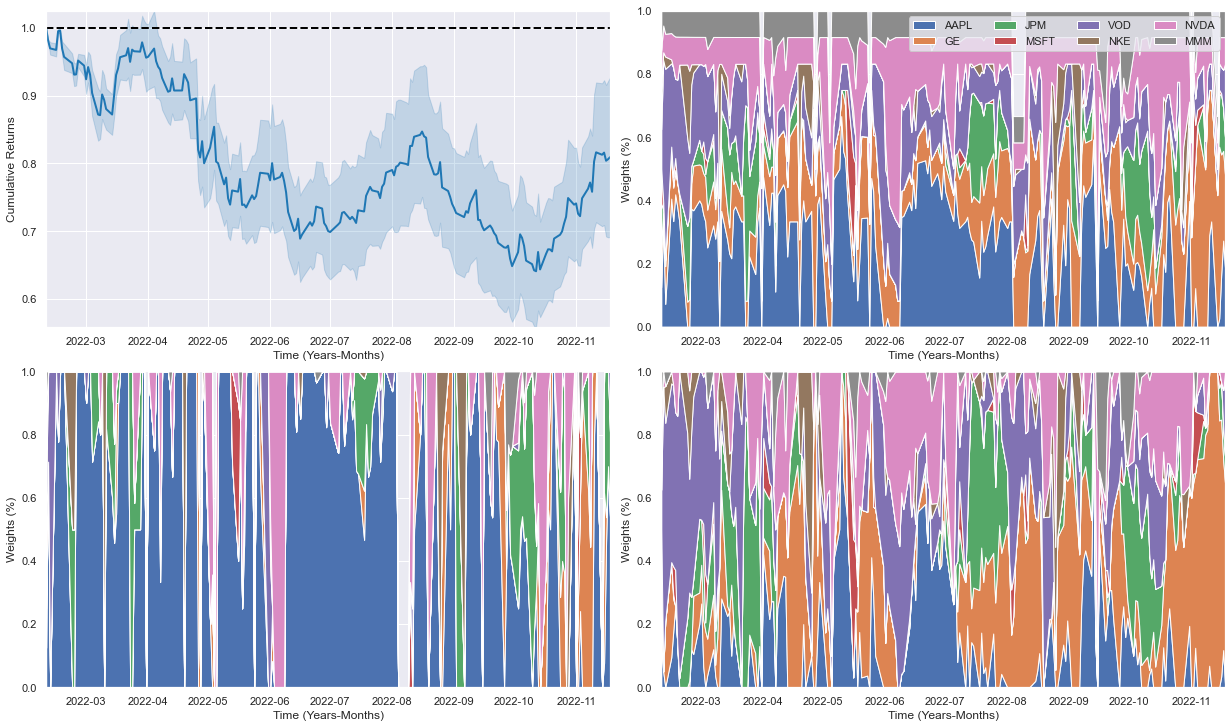

In [99]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

sac_mean = np.mean(np.array(Cumulative_returns_daily_drl_sac),axis=0)
sac_std = np.std(np.array(Cumulative_returns_daily_drl_sac),axis=0)

axs[0,0].plot(test_re_df.index, sac_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, sac_mean - sac_std, sac_mean + sac_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_sac_ = np.mean(np.array(portfolio_weights_sac),axis=0)
df = pd.DataFrame (portfolio_weights_sac_, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )
axs[0,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,1].legend(loc='upper right', ncol=4)
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_sac_ = portfolio_weights_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
df = pd.DataFrame (portfolio_weights_sac_, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )
axs[1,0].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_sac_ = portfolio_weights_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
df = pd.DataFrame (portfolio_weights_sac_, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )
axs[1,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

### TD3

In [100]:
algo = "TD3"


In [26]:
algo = "TD3"
Cumulative_returns_daily_drl_td3 = np.zeros([runs, length])
portfolio_weights_td3 = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_td3[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_td3[i])
    cont = cont +1
    # if check != length:
    #     continue

    return_stocks = test_re_df.pct_change()
    return_stocks_td3 = np.sum(return_stocks.multiply(portfolio_weights_td3[i]),axis=1)
    Cumulative_returns_daily_drl_td3[i] = (1+return_stocks_td3).cumprod()
    i = i+1

Init stocks in init() :  [10, 10, 10, 10, 10, 10, 10, 10]
Training time:  2.0653990586598714  minutes
Init stocks in init() :  [10, 10, 10, 10, 10, 10, 10, 10]
DAY  0
DAY  1
DAY  2
DAY  3
DAY  4
DAY  5
DAY  6
DAY  7
DAY  8
DAY  9
DAY  10
DAY  11
DAY  12
DAY  13
DAY  14
DAY  15
DAY  16
DAY  17
DAY  18
DAY  19
DAY  20
DAY  21
DAY  22
DAY  23
DAY  24
DAY  25
DAY  26
DAY  27
DAY  28
DAY  29
DAY  30
DAY  31
DAY  32
DAY  33
DAY  34
DAY  35
DAY  36
DAY  37
DAY  38
DAY  39
DAY  40
DAY  41
DAY  42
DAY  43
DAY  44
DAY  45
DAY  46
DAY  47
DAY  48
DAY  49
DAY  50
DAY  51
DAY  52
DAY  53
DAY  54
DAY  55
DAY  56
DAY  57
DAY  58
DAY  59
DAY  60
DAY  61
DAY  62
DAY  63
DAY  64
DAY  65
DAY  66
DAY  67
DAY  68
DAY  69
DAY  70
DAY  71
DAY  72
DAY  73
DAY  74
DAY  75
DAY  76
DAY  77
DAY  78
DAY  79
DAY  80
DAY  81
DAY  82
DAY  83
DAY  84
DAY  85
DAY  86
DAY  87
DAY  88
DAY  89
DAY  90
DAY  91
DAY  92
DAY  93
DAY  94
DAY  95
DAY  96
DAY  97
DAY  98
DAY  99
DAY  100
DAY  101
DAY  102
DAY  103
DAY  104
DAY  

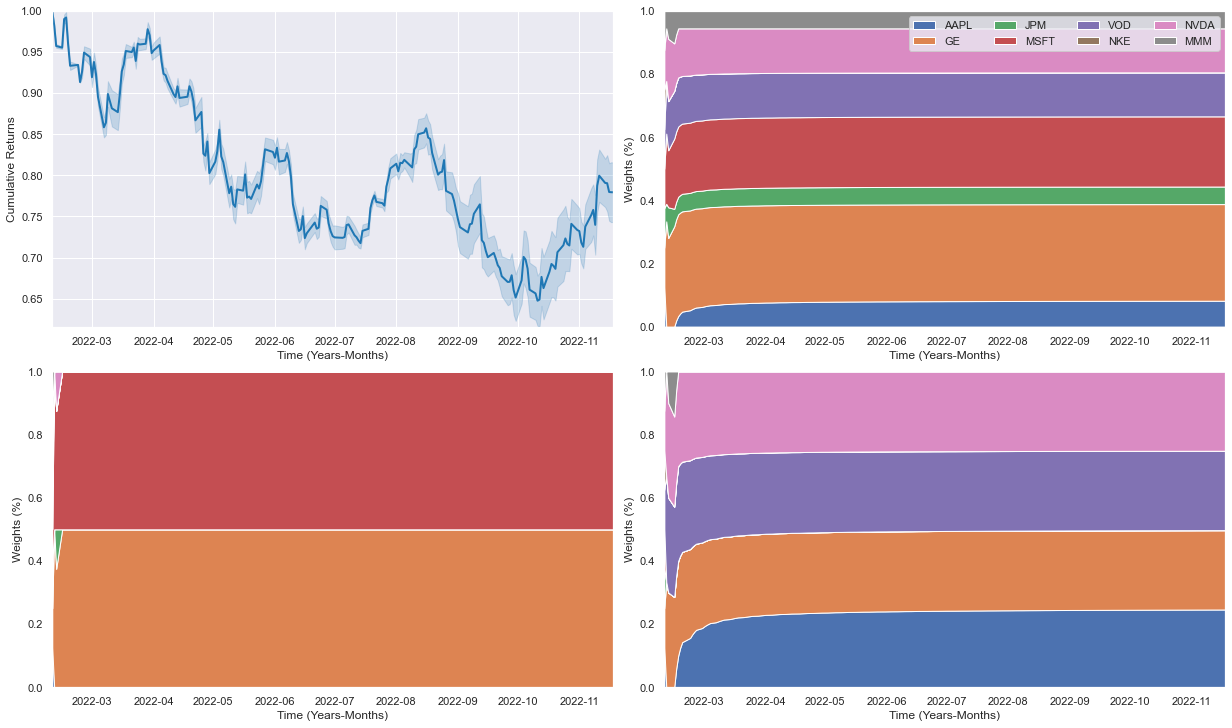

In [101]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

td3_mean = np.mean(np.array(Cumulative_returns_daily_drl_td3),axis=0)
td3_std = np.std(np.array(Cumulative_returns_daily_drl_td3),axis=0)

axs[0,0].plot(test_re_df.index, td3_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, td3_mean - td3_std, td3_mean + td3_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_td3_ = np.mean(np.array(portfolio_weights_td3),axis=0)
df = pd.DataFrame (portfolio_weights_td3_, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )
axs[0,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,1].legend(loc='upper right',ncol=4)
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_td3_ = portfolio_weights_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
df = pd.DataFrame (portfolio_weights_td3_, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )
axs[1,0].stackplot(test_re_df.index,collective_df, labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_td3_ = portfolio_weights_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
df = pd.DataFrame (portfolio_weights_td3_, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )
axs[1,1].stackplot(test_re_df.index,collective_df, labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

## Traditional approaches

In [28]:
! pip install pyportfolioopt

In [29]:
! pip install Riskfolio-Lib

In [30]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns, objective_functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import riskfolio as rp

In [31]:
# working days in a year 252
window = 50
start = len(train_re_df)-window
data = re_df.iloc[start:]
data = data.reset_index(drop=True)

### Min-Variance Portfolio Allocation

In [32]:
portfolio_weights_min_var = np.zeros([test_re_df.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var.shape[0]):    
    sel = data.iloc[i:window+i]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S)
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True,
        )

    portfolio_weights_min_var[idx]=np.array([weights[j] for j in tickers])
    idx +=1

d:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [33]:
test_re_df.shape

(197, 8)

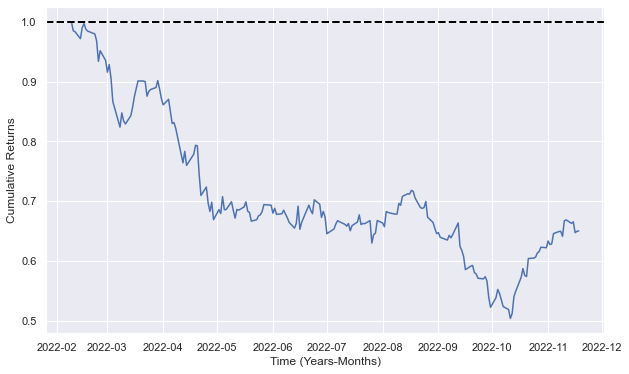

In [102]:
return_stocks = test_re_df.pct_change()
return_stocks_min_var = np.sum(return_stocks.multiply(portfolio_weights_min_var),axis=1)
Cumulative_returns_daily_min_var = (1+return_stocks_min_var).cumprod()
plt.plot(Cumulative_returns_daily_min_var)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.savefig("Tangent_Portfolio"+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')


Text(0.5, 0, 'Time (Years-Months)')

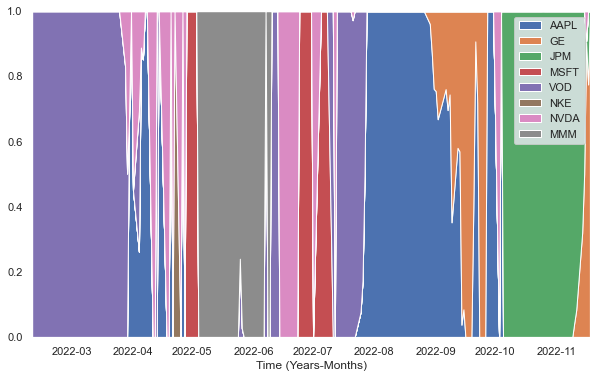

In [103]:
df = pd.DataFrame (portfolio_weights_min_var, index = test_re_df.index, columns = tickers)
# collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
collective_df = ()
for t in tickers :
    collective_df += (df[t], )
plt.stackplot(test_re_df.index, collective_df, labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

### Min volatility

In [36]:
portfolio_weights_min_vol = np.zeros([test_re_df.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_vol.shape[0]):    
    sel = data.iloc[i:window+i]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S)  
    weights = ef.min_volatility() 
   
    portfolio_weights_min_vol[idx]=np.array([weights[j] for j in tickers])
    idx +=1

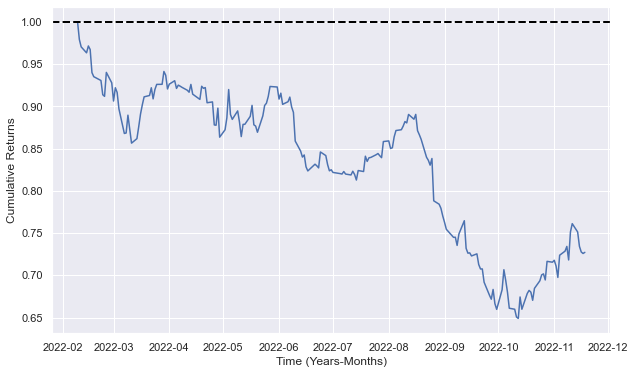

In [104]:
return_stocks_min_vol = np.sum(return_stocks.multiply(portfolio_weights_min_vol),axis=1)
Cumulative_returns_daily_min_vol = (1+return_stocks_min_vol).cumprod()
plt.plot(Cumulative_returns_daily_min_vol)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.savefig("Min volatality"+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

Text(0.5, 0, 'Time (Years-Months)')

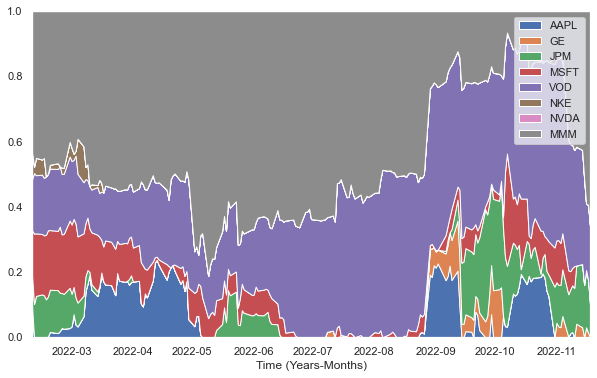

In [105]:
df = pd.DataFrame (portfolio_weights_min_vol, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )
plt.stackplot(test_re_df.index, collective_df, labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

### Risk Parity

In [39]:
portfolio_weights_risk = np.zeros([test_re_df.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_risk.shape[0]):    
    sel = data.iloc[i:window+i]
   
    # Building the portfolio object
    port = rp.Portfolio(returns=sel)

    # Calculating optimal portfolio
    # Select method and estimate input parameters:
    method_mu='hist' # Method to estimate expected returns based on historical data.
    method_cov='hist' # Method to estimate covariance matrix based on historical data.

    port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

    model='Classic' # Could be Classic (historical) or FM (Factor Model)
    rm = 'MV' # Risk measure used, this time will be variance
    hist = True # Use historical scenarios for risk measures that depend on scenarios
    rf = 0 # Risk free rate
    b = None # Risk contribution constraints vector
    weights = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)
   
    portfolio_weights_risk[idx]=np.squeeze(np.array(weights))
    idx +=1  

d:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
d:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
d:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
d:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
d:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another 

WARNING - large complementary slackness residual: 30.189833


d:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
d:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
d:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


WARNING - large complementary slackness residual: 25.407485


d:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
d:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
d:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
d:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
d:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another 

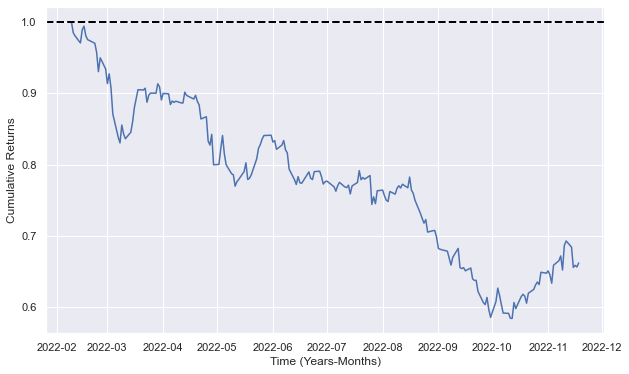

In [106]:
return_stocks = test_re_df.pct_change()
return_stocks_risk = np.sum(return_stocks.multiply(portfolio_weights_risk),axis=1)
Cumulative_returns_daily_risk = (1+return_stocks_risk).cumprod()
plt.plot(Cumulative_returns_daily_risk)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.savefig("Risk Parity"+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

Text(0.5, 0, 'Time (Years-Months)')

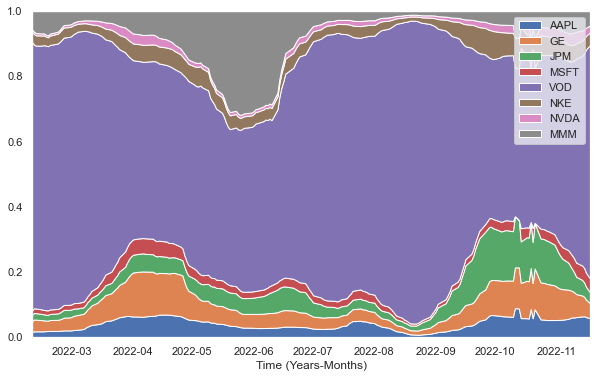

In [107]:
df = pd.DataFrame (portfolio_weights_risk, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )
plt.stackplot(test_re_df.index,collective_df, labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

### Equal weighting

In [42]:
portfolio_weights_equal = np.ones([test_re_df.shape[0],test_re_df.shape[1]])/test_re_df.shape[1]

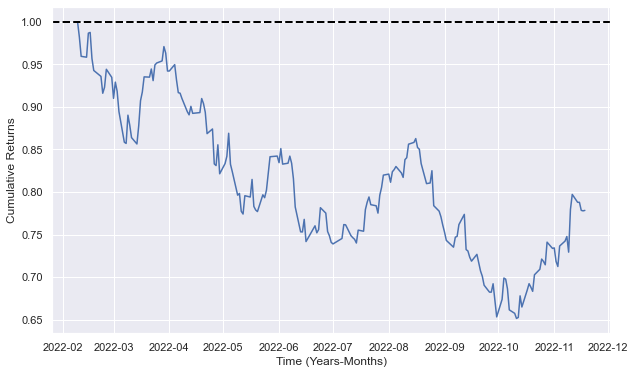

In [108]:
return_stocks = test_re_df.pct_change()
return_stocks_equal = np.sum(return_stocks.multiply(portfolio_weights_equal),axis=1)
Cumulative_returns_daily_equal = (1+return_stocks_equal).cumprod()
plt.plot(Cumulative_returns_daily_equal)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.savefig("Equal_weight"+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

Text(0.5, 0, 'Time (Years-Months)')

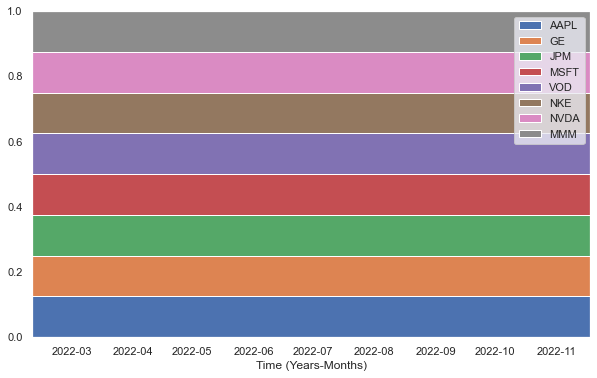

In [109]:
df = pd.DataFrame (portfolio_weights_equal, index = test_re_df.index, columns = tickers)

collective_df = ()
for t in tickers :
    collective_df += (df[t], )

plt.stackplot(test_re_df.index,collective_df, labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

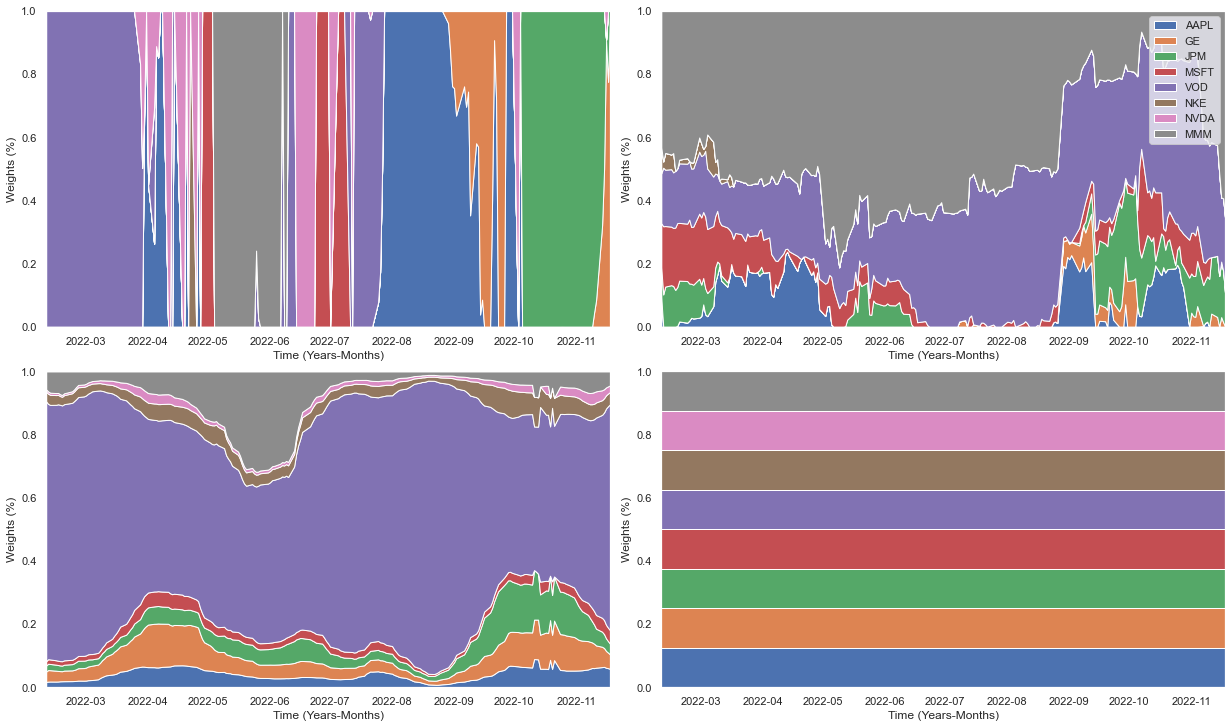

In [110]:

fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

df = pd.DataFrame (portfolio_weights_min_var, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )
axs[0,0].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].set_ylabel("Weights (%)")
axs[0,0].set_xlabel("Time (Years-Months)")

df = pd.DataFrame (portfolio_weights_min_vol, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )
axs[0,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,1].legend(loc='upper right')
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

df = pd.DataFrame (portfolio_weights_risk, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )
axs[1,0].stackplot(test_re_df.index, collective_df)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

df = pd.DataFrame (portfolio_weights_equal, index = test_re_df.index, columns = tickers)
collective_df = ()
for t in tickers :
    collective_df += (df[t], )
axs[1,1].stackplot(test_re_df.index, collective_df)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")


plt.savefig('traditional0.png',bbox_inches='tight')

## Plotting all cumulative returns mtogether

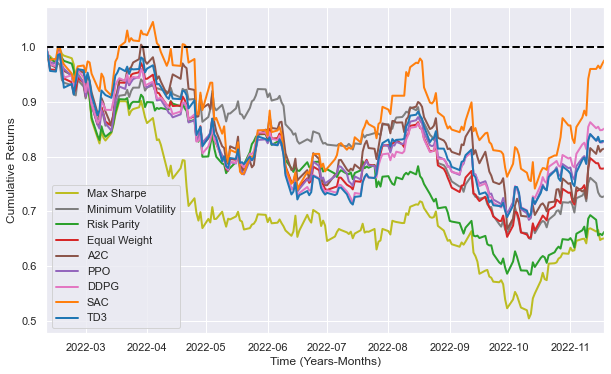

In [111]:
x = Cumulative_returns_daily_equal.index.values

plt.plot(x, Cumulative_returns_daily_min_var, color='tab:olive', label="Max Sharpe", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_min_vol, color='tab:gray', label="Minimum Volatility", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_risk, color='tab:green', label="Risk Parity", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_equal, color='tab:red', label="Equal Weight", linewidth =2.0)

a2c = Cumulative_returns_daily_drl_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
plt.plot(x, a2c, color='tab:brown', label='A2C', linewidth =2.0)
ppo = Cumulative_returns_daily_drl_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
plt.plot(x, ppo, color='tab:purple', label='PPO', linewidth =2.0)
ddpg = Cumulative_returns_daily_drl_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
plt.plot(x, ddpg, color='tab:pink', label='DDPG', linewidth =2.0)
sac = Cumulative_returns_daily_drl_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
plt.plot(x, sac, color='tab:orange', label='SAC', linewidth =2.0)
td3 = Cumulative_returns_daily_drl_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
plt.plot(x, td3, color='tab:blue', label='TD3', linewidth =2.0)

plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_max0.png',bbox_inches='tight')

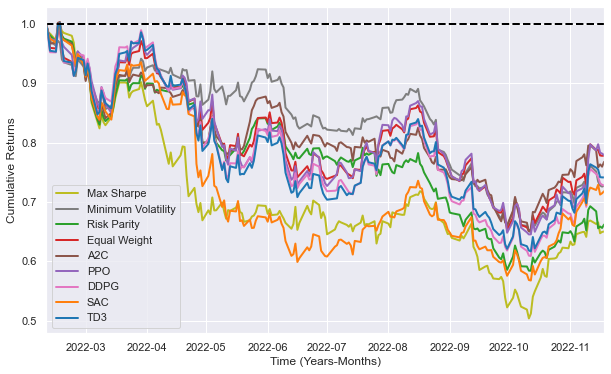

In [112]:
x = Cumulative_returns_daily_equal.index.values

plt.plot(x, Cumulative_returns_daily_min_var, color='tab:olive', label="Max Sharpe", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_min_vol, color='tab:gray', label="Minimum Volatility", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_risk, color='tab:green', label="Risk Parity", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_equal, color='tab:red', label="Equal Weight", linewidth =2.0)

a2c = Cumulative_returns_daily_drl_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
plt.plot(x, a2c, color='tab:brown', label='A2C', linewidth =2.0)
ppo = Cumulative_returns_daily_drl_ppo[np.argmin(Cumulative_returns_daily_drl_ppo[:,-1])]
plt.plot(x, ppo, color='tab:purple', label='PPO', linewidth =2.0)
ddpg = Cumulative_returns_daily_drl_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
plt.plot(x, ddpg, color='tab:pink', label='DDPG', linewidth =2.0)
sac = Cumulative_returns_daily_drl_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
plt.plot(x, sac, color='tab:orange', label='SAC', linewidth =2.0)
td3 = Cumulative_returns_daily_drl_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
plt.plot(x, td3, color='tab:blue', label='TD3', linewidth =2.0)

plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_min0.png',bbox_inches='tight')

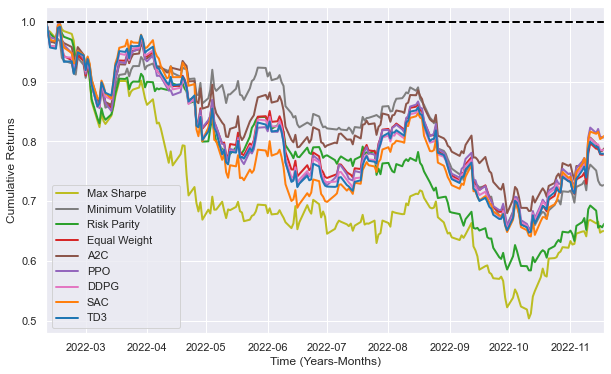

In [113]:
# portfolio_weights_td3_ = np.mean(np.array(portfolio_weights_td3),axis=0)
x = Cumulative_returns_daily_equal.index.values

plt.plot(x, Cumulative_returns_daily_min_var, color='tab:olive', label="Max Sharpe", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_min_vol, color='tab:gray', label="Minimum Volatility", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_risk, color='tab:green', label="Risk Parity", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_equal, color='tab:red', label="Equal Weight", linewidth =2.0)

a2c = np.mean(np.array(Cumulative_returns_daily_drl_a2c),axis=0)
plt.plot(x, a2c, color='tab:brown', label='A2C', linewidth =2.0)
ppo = np.mean(np.array(Cumulative_returns_daily_drl_ppo),axis=0)
plt.plot(x, ppo, color='tab:purple', label='PPO', linewidth =2.0)
ddpg = np.mean(np.array(Cumulative_returns_daily_drl_ddpg), axis = 0)
plt.plot(x, ddpg, color='tab:pink', label='DDPG', linewidth =2.0)
sac = np.mean(np.array(Cumulative_returns_daily_drl_sac), axis = 0)
plt.plot(x, sac, color='tab:orange', label='SAC', linewidth =2.0)
td3 = np.mean(np.array(Cumulative_returns_daily_drl_td3), axis=0)
plt.plot(x, td3, color='tab:blue', label='TD3', linewidth =2.0)
x
plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_average0.png',bbox_inches='tight')

In [114]:
portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
return_stocks_ppo = np.sum(return_stocks.multiply(portfolio_weights_ppo_),axis=1)

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
return_stocks_a2c = np.sum(return_stocks.multiply(portfolio_weights_a2c_),axis=1)

portfolio_weights_ddpg_ = portfolio_weights_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
return_stocks_ddpg = np.sum(return_stocks.multiply(portfolio_weights_ddpg_),axis=1)

portfolio_weights_sac_ = portfolio_weights_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
return_stocks_sac = np.sum(return_stocks.multiply(portfolio_weights_sac_),axis=1)

portfolio_weights_td3_ = portfolio_weights_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
return_stocks_td3 = np.sum(return_stocks.multiply(portfolio_weights_td3_),axis=1)

In [74]:
portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmin(Cumulative_returns_daily_drl_ppo[:,-1])]
return_stocks_ppo = np.sum(return_stocks.multiply(portfolio_weights_ppo_),axis=1)

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
return_stocks_a2c = np.sum(return_stocks.multiply(portfolio_weights_a2c_),axis=1)

portfolio_weights_ddpg_ = portfolio_weights_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
return_stocks_ddpg = np.sum(return_stocks.multiply(portfolio_weights_ddpg_),axis=1)

portfolio_weights_sac_ = portfolio_weights_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
return_stocks_sac = np.sum(return_stocks.multiply(portfolio_weights_sac_),axis=1)

portfolio_weights_td3_ = portfolio_weights_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
return_stocks_td3 = np.sum(return_stocks.multiply(portfolio_weights_td3_),axis=1)

In [75]:
return_stocks_ppo
return_stocks_a2c
return_stocks_ddpg
return_stocks_sac
return_stocks_td3
return_stocks_min_var
return_stocks_min_vol
return_stocks_risk
return_stocks_equal
print("")

## Other statistics

In [52]:
! pip install pyfolio

In [94]:
import pyfolio

d:\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [96]:
# with pyfolio.plotting.plotting_context(font_scale=1.1): pyfolio.create_full_tear_sheet(returns = return_stocks_ppo, set_context=False)